# Algebra liniowa z zastosowaniami 1
## Ćwiczenia w sali komputerowej nr 6
Uzupełnij swoje dane i sprawdź czy wyświetlają się poprawnie:

In [520]:
IMIE_NAZWISKO = "Daniel Stodulski"

print(IMIE_NAZWISKO)

Daniel Stodulski


Standardowo zaczniemy od wczytania biblioteki ```numpy```

In [521]:
import numpy as np

### **Bazy przestrzeni wektorowych**

Przypomnijmy, że układ wektorów $S=(v_1, v_2, \dots)$ przestrzeni $V$ nazywamy `bazą przestrzeni` $V$, jeśli są spełnione następujące warunki
1. układ $S$ jest liniowo niezależny,
2. układ $S$ rozpina przestrzeń $V$, tzn. $V=L(S)$.

Jeżeli układ wektorów $S=(v_1,v_2,\ldots,v_n)$ będący bazą jest skończony, to mówimy, że $V$ ma `bazę skończoną`.

Każdy wektor $v$ przestrzeni $V$ można przedstawić jako kombinajcę liniową wektorów bazy. Współczynniki tej kombinacji wskazują jakie są współrzędne wektora $v$ względem danej bazy. 

W przestrzeniach wektorowych można określić więcej niż jedną bazę. 

Wielomiany stopnia nie wyższego niż $n<\infty$ można przedstawić jako kombinację liniową  
1. jednomianów: $1, x, x^2, \dots, x^n$
2. wielomanów Lagrange'a (kardynalnych)
$$l_i(x) = \prod_{j=0, j\neq i}^n \frac{x-x_j}{x_i-x_j}$$
przy czym $x_i\neq x_j$ dla $i\neq j$
3. wielomianów Newtona
$$
p_j(x) = \prod_{i=0}^{j-1}(x-x_i)
$$

Zobaczymy jak dla zadanych $n+1$ różnych punktów $(x_0,y_0),$ $(x_1,y_1),$ $(x_2,y_2),\cdots$ $(x_n,y_n)$ można skonstruować wielomian stopnia nie wyższego niż $n$ przechodzący przez te punkty i wyrazić ten wielomian jako kombinacje liniowe: jednomianów, wielomianów Lagrange'a albo wielomianów Newtona.

#### **Wielomian interpolacyjny w postaci naturalnej**

Konstrukcję wielomianu interpolacyjnego w postaci naturalnej 
$$W_n(x) = a_nx^n + a_{n-1}x^{n-1} + \cdots a_1x +  a_0$$ 
poznaliśmy już na ćwiczeniach komputerowych nr 3 i ćwiczeniach przy tablicy konstruując układy równań spełniających wskazane warunki. W przypadku $n+1$ warunków i wyznaczaniu wielomianu stopnia nie wyższego niż $n$ należy rozwiązać układ równań o [macierzy Vandermonde'a](https://pl.wikipedia.org/wiki/Macierz_Vandermonde%E2%80%99a). Metoda ta nie ma praktycznego zastosowania obliczeniowego, posłuży nam jednak do konstrukcji wielomianu interpolacyjnego w oparciu o wektory bazowe=jednomiany.

##### **Zadanie 1** (3 pkt.)

Napisz funkcję `monomial_interp()`, która będzie zwracała współczynniki wielomianu interpolacyjnego w postaci naturalnej. 

Danymi wejściowymi mają być punkty, przez które ma przechodzić wielomian interpolacyjny. 

Jako wynik mają być zwrócone:
1. komunikat `Powtarzający się argument` jeżeli $x_i=x_j$ dla $i\neq j$ 
2. macierz Vandermonde'a
3. wielomian interpolacyjny 

**UWAGA** **Nie można używać** `scipy.interpolate`, `numpy.interp`.

In [522]:
def monomial_interp(x, y):
    
    # UMIEŚĆ SWÓJ KOD TUTAJ
    V = []
    for i in range(len(x)):
        for j in range(i + 1, len(x)):
            if(x[i] == x[j]):
                print("Powtarzający się argument")
                return -1
    for i in range(len(x)):
        T = []
        for j in range(len(x)):
            T.append(x[i]**j)
        V.append(T)
    V = np.array(V)

    res = np.linalg.solve(V, y)

    return V, res

x = [1, 2, 3]
y = [1, 5, 13]

print(monomial_interp(x,y)[0], "\n", monomial_interp(x,y)[1])

x = [1, 2, 2]
y = [1, 5, 13]

print(monomial_interp(x,y))


[[1 1 1]
 [1 2 4]
 [1 3 9]] 
 [ 1. -2.  2.]
Powtarzający się argument
-1


Przykładowy przypadek testowy 1:

```plaintext
x = [1, 2, 3]
y = [1, 5, 13]
```
oczekiwany wynik

```plaintext
array([[1, 1, 1],
       [1, 2, 4],
       [1, 3, 9]])
        
1.0 - 2.0 x + 2.0 x**2
```

Przykładowy przypadek testowy 2:

```plaintext
x = [1, 2, 2]
y = [1, 5, 13]
```
oczekiwany wynik

```plaintext
'Powtarzający się argument'
```

##### **Rys. 1** Wykres wielomianu interpolacyjnego i wielomianów z bazy standardowej dla danych z przypadku testowego.

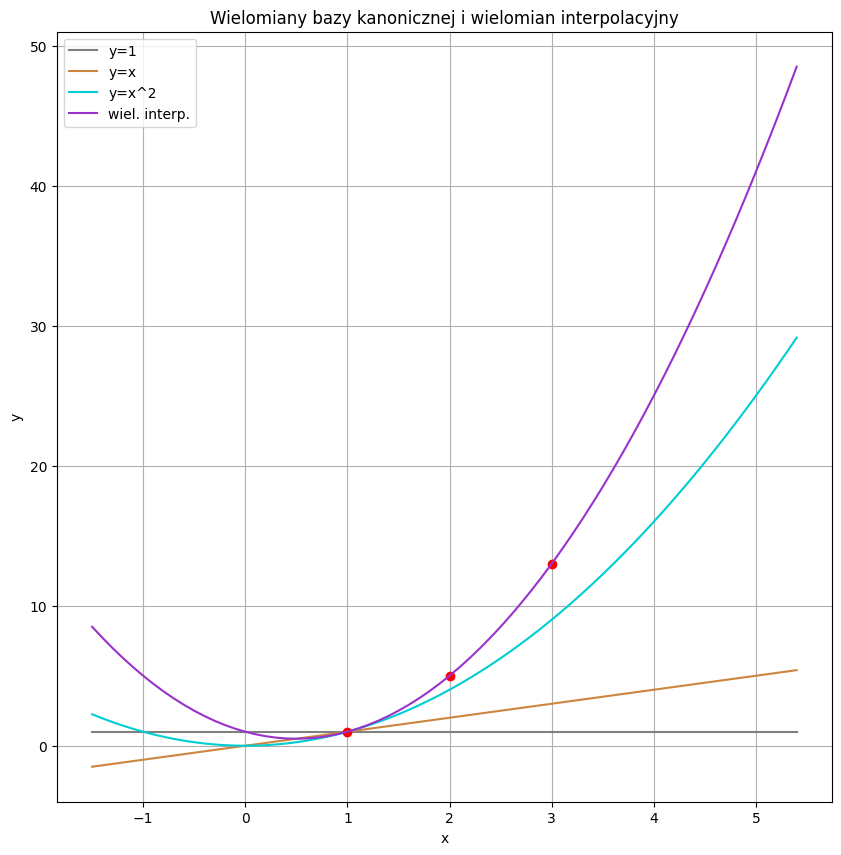

In [523]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

x = [1, 2, 3]
y = [1, 5, 13]

x0_coeff = [1, 0, 0]
x1_coeff = [0, 1, 0]
x2_coeff = [0, 0, 1]

x0 = poly.Polynomial(x0_coeff)
x1 = poly.Polynomial(x1_coeff)
x2 = poly.Polynomial(x2_coeff)

x_plot = np.arange(-1.5, 5.5, 0.1)
fig = plt.figure(figsize = (10,10))
plt.plot(x_plot, x0(x_plot), "grey", label = "y=1")
plt.plot(x_plot, x1(x_plot), "peru", label = "y=x")
plt.plot(x_plot, x2(x_plot), "darkturquoise", label = "y=x^2")
plt.plot(x, y, "ro")
interpolant = poly.Polynomial([1,-2,2])
plt.plot(x_plot, interpolant(x_plot), "darkorchid", label = "wiel. interp.")
plt.title("Wielomiany bazy kanonicznej i wielomian interpolacyjny")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

#### **Wielomian interpolacyjny w postaci Lagrange'a**

$$ 
L_n(x)= \sum^{n}_{i=0} y_il_i(x)=
\sum^{n}_{i=0}y_i\prod^{n}_{j=0, \   j \neq i}\frac{x-x_{j}}{x_{i}-x_{j}}.
$$

##### **Przykład 1**

Skonstruuj wielomiany Lagrange'a i wielomian interpolacyjny w postaci Lagrange'a dla danych

$x_0=1,x_1=2,x_2=3$

$y_0=f(x_0)=1, y_1 = f(x_1)=5, y_2 = f(x_{2})=13$

Liczba węzłów $=n+1 \rightarrow$ stopień wielomianu będzie co najwyżej $=2.$

$$l_0(x) = \prod_{j=1}^2 \frac{x-x_j}{x_0-x_j} = \Big(\frac{x-x_1}{x_0-x_1}\Big )\Big (\frac{x-x_2}{x_0-x_2} \Big ) = \frac{1}{(-1)(-2)}(x-2)(x-3) = 
\frac{1}{2}x^2 - \frac{5}{2}x +3$$ 

$$l_1(x) = \prod_{j=0, j\neq 1}^2 \frac{x-x_j}{x_1-x_j} = \Big(\frac{x-x_0}{x_1-x_0}\Big)\Big(\frac{x-x_2}{x_1-x_2}\Big) = \frac{1}{1(-1)}(x-1)(x-3) = 
-x^2 + 4x -3$$

$$l_2(x) = \prod_{j=0}^1 \frac{x-x_j}{x_2-x_j}=\Big(\frac{x-x_0}{x_2-x_0}\Big)\Big(\frac{x-x_1}{x_2-x_1}\Big) = \frac{1}{2(1)}(x-1)(x-2) = 
\frac{1}{2}x^2 - \frac{3}{2}x +1$$

Wielomian interpolacyjny w postaci Lagrange'a

$$
L_2(x)= \sum_{i=0}^2 y_il_i(x)= 1\Big (\frac{1}{2}x^2 - \frac{5}{2}x +3 \Big ) + 5\Big (-x^2 + 4x -3 \Big )+ 13 \Big (\frac{1}{2}x^2 - \frac{3}{2}x +1 \Big )
$$

Sprawdzenie warunków interpolacji

$$
L_2(1) = 1\Big (\frac{1}{2} - \frac{5}{2} +3 \Big ) + 5\Big (-1 + 4 -3 \Big )+ 13 \Big (\frac{1}{2} - \frac{3}{2}x +1 \Big ) = 1 = y_0
$$

$$
L_2(2) = 1\Big (\frac{1}{2}(4) - \frac{5}{2}(2) +3 \Big ) + 5\Big (-(4) + 4(2) -3 \Big )+ 13 \Big (\frac{1}{2}(4) - \frac{3}{2}(2) +1 \Big ) = 5 = y_1
$$

$$
L_2(3) = 1\Big (\frac{1}{2}(9) - \frac{5}{2}(3) +3 \Big ) + 5\Big (-(9) + 4(3) -3 \Big )+ 13 \Big (\frac{1}{2}(9) - \frac{3}{2}(3) +1 \Big ) = 13 = y_2
$$


##### **Zadanie 2** (3 pkt.)

Napisz funkcję `lagrange_interp()`, która będzie zwracała współczynniki kolejnych wielomianów kardynalnych 

$$l_i(x) = \prod_{j=0, j\neq i}^n \frac{x-x_j}{x_i-x_j}$$  

Danymi wejściowymi mają być punkty, przez które ma przechodzić wielomian interpolacyjny. 

Jako wynik mają być zwrócone:
1. komunikat `Powtarzający się argument` jeżeli $x_i=x_j$ dla $i\neq j$ 
2. wielomiany kardynalne $l_i(x),$ $i=0, 1, \dots, n$
3. wielomian interpolacyjny Lagrange'a (po urposzczeniu) 

**UWAGA** **Nie można używać** `scipy.interpolate`, `numpy.interp`!

In [524]:
def lagrange_interp(x, y):
    
    # UMIEŚĆ SWÓJ KOD TUTAJ
    for i in range(len(x)):
        for j in range(i + 1, len(x)):
            if(x[i] == x[j]):
                print("Powtarzający się argument")
                return -1
    
    T = []
    for i in range(len(x)):
        r = np.polynomial.Polynomial([1.0])
        for j in range(len(x)):
            if i != j:
                r *= np.polynomial.Polynomial([-x[j], 1.0]) * (1.0 / (x[i] - x[j]))
        T.append(r)
    L = np.polynomial.Polynomial([0.0])
    for i in range(len(x)):
        L += y[i] * np.polynomial.Polynomial(T[i])

    return T, L

x = [1, 2, 3]
y = [1, 5, 13]

print(lagrange_interp(x,y))

x = [2, -2, 2]
y = [0, 4, 12]

print(lagrange_interp(x,y))

([Polynomial([ 3. , -2.5,  0.5], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'), Polynomial([-3.,  4., -1.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'), Polynomial([ 1. , -1.5,  0.5], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')], Polynomial([Polynomial([ 1., -2.,  2.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')],
      dtype=object, domain=[-1.,  1.], window=[-1.,  1.], symbol='x'))
Powtarzający się argument
-1


Przykładowy przypadek testowy 1:

```plaintext
x = [1, 2, 3]
y = [1, 5, 13]
```
oczekiwany wynik

```plaintext
3.0 - 2.5 x + 0.5 x**2
-3.0 + 4.0 x - 1.0 x**2
1.0 - 1.5 x + 0.5 x**2
1.0 - 2.0 x + 2.0 x**2
```

Przykładowy przypadek testowy 2:

```plaintext
x = [2, -2, 2]
y = [0, 4, 12]
```
oczekiwany wynik

```plaintext
'Powtarzający się argument'
```

##### **Rys. 2** Wykres wielomianu interpolacyjnego i wielomianów bazowych Lagrange'a dla danych z przypadku testowego.

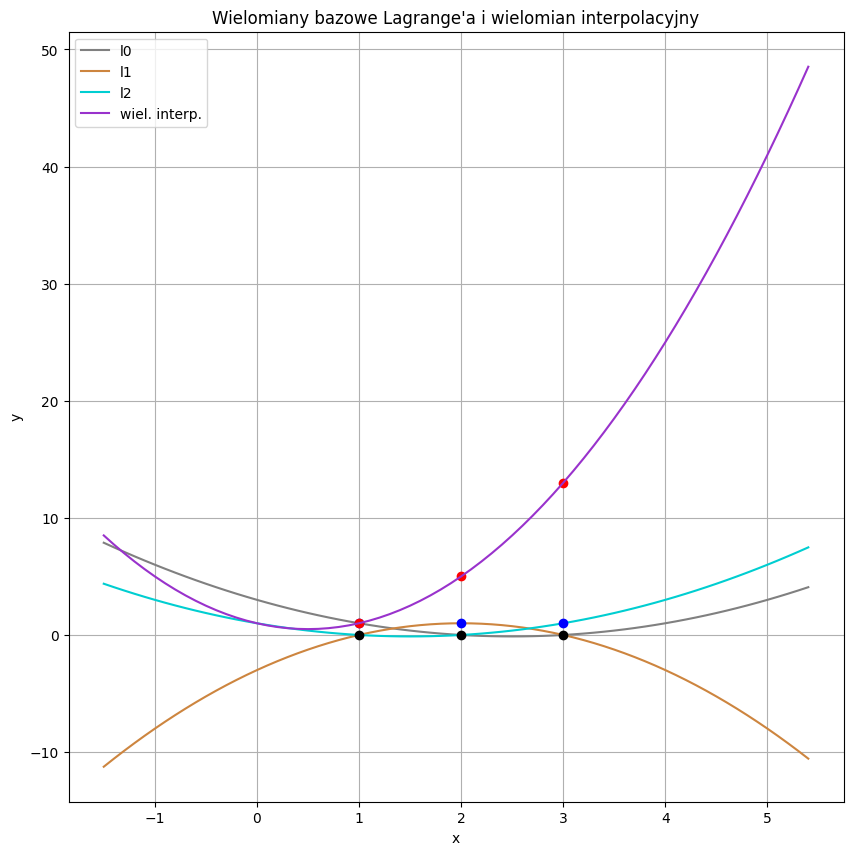

In [525]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

x = [1, 2, 3]
y = [1, 5, 13]

l0_coeff = [3,-2.5,0.5]
l1_coeff = [-3, 4,-1]
l2_coeff = [1,-1.5,0.5]

l0 = poly.Polynomial(l0_coeff)
l1 = poly.Polynomial(l1_coeff)
l2 = poly.Polynomial(l2_coeff)

x_plot = np.arange(-1.5, 5.5, 0.1)
fig = plt.figure(figsize = (10,10))
plt.plot(x_plot, l0(x_plot), "grey", label = "l0")
plt.plot(x_plot, l1(x_plot), "peru", label = "l1")
plt.plot(x_plot, l2(x_plot), "darkturquoise", label = "l2")
plt.plot(x, np.ones(len(x)), "bo", x,np.zeros(len(x)), "ko")
plt.plot(x, y, "ro")
interpolant = poly.Polynomial([1,-2,2])
plt.plot(x_plot, interpolant(x_plot), "darkorchid", label = "wiel. interp.")
plt.title("Wielomiany bazowe Lagrange'a i wielomian interpolacyjny")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

#### **Wielomian interpolacyjny w postaci Newtona**

Wzór interpolacyjny Newtona oparty jest o wielomiany bazowe Newtona definiowane następująco
$$
p_0(x)=1,
$$
$$
p_i(x)=(x-x_0)(x-x_1)\dots(x-x_{i-1}), \ \ \ \ i= 1,2, \dots,n.
$$

Wówczas wielomian interpolacyjny w postaci Newtona ma następującą postać 
$$
N_n(x)=\sum_{i=0}^n f[x_0, x_1, \dots, x_i] p_i(x) = c_ip_i(x),
$$
gdzie $c_i=f[x_0, x_1, \dots, x_i]$ to **iloraz różnicowy rzędu** $i-$ tego oparty na $i+1$ różnych węzłach $x_0, x_1, \cdots, x_i$ (węzeł = wartość $x$ zadanych punktów interpolacji), który rekurencyjnie można zdefiniować następująco
$$\color{red}{f[x_k]=f(x_k)=y_k}$$ oraz 
$$\color{red}{f[x_k,x_{k+1}]=\frac{f(x_{k+1})-f(x_{k})}{x_{k+1}-x_{k}}=\frac{y_{k+1}-y_{k}}{x_{k+1}-x_{k}}}
$$
i dla dowolnego układu parami różnych punktów
$x_l, x_{l+1}, \dots, x_{l+k}$ należących do dziedziny funkcji interpolowanej $f$ 
$$
\color{red}{f[x_l, x_{l+1}, \dots, x_{l+k}]=
\frac{f[x_{l+1}, x_{l+2}, \dots, x_{l+k}]-f[x_l, x_{l+1}, \dots, x_{l+k-1}]}{x_{l+k}-x_l}}
$$
Np. dla $l=0$ i $k=3$ 
$$
f[x_0, x_1, x_2, x_3]=
\frac{f[x_1, x_2, x_3]-f[x_0, x_1, x_2}{x_3-x_0}
$$
gdzie
$$
f[x_0, x_1, x_2]=
\frac{f[x_1, x_2]-f[x_0, x_1]}{x_2-x_0}
$$ 
$$
f[x_1, x_2, x_3]=
\frac{f[x_2, x_3]-f[x_1, x_2]}{x_3-x_1}
$$
następnie liczymy
$$f[x_1,x_2]=\frac{f(x_2)-f(x_1)}{x_2-x_1}=\frac{y_2-y_1}{x_2-x_1}
$$
$$f[x_0,x_1]=\frac{f(x_1)-f(x_0)}{x_1-x_0}=\frac{y_1-y_0}{x_1-x_0}
$$
$$f[x_2,x_3]=\frac{f(x_3)-f(x_2)}{x_3-x_2}=\frac{y_3-y_2}{x_3-x_2}
$$
i na końcu
$$f[x_0]=f(x_0)=y_0$$  
$$f[x_1]=f(x_1)=y_1$$  
$$f[x_2]=f(x_2)=y_2$$  
$$f[x_3]=f(x_3)=y_3$$  

W celu uniknięcia wielokrotnego obliczania ilorazów niższych rzędów w wywołaniach rekurencyjnych, ilorazy różnicowe korzystniej jest zapisać w postaci następującej tabeli

$$
\begin{array}{c|c|c|c|c|c}
i&x_i&f(x_i)&f[x_{i-1}, x_i]&f[x_{i-2}, x_{i-1}, x_i]&\dots\\ \hline
0&x_0&\mathbf{f(x_0)}\leftarrow c_0&&&\\
1&x_1&f(x_1)&\mathbf{f[x_0, x_1]}\leftarrow c_1&&\\
2&x_2&f(x_2)&f[x_1, x_2]&\mathbf{f[x_0, x_1, x_2]}\leftarrow c_2&\\
3&x_3&f(x_3)&f[x_2, x_3]&f[x_1, x_2, x_3]&\dots\\
\dots&\dots&\dots&\dots&\dots&\dots
\end{array}
$$

##### **Przykład 2**

Skonstruuj tabelę ilorazów różnicowych i wiel. interp. w postaci Newtona dla danych

$x_0=1,x_1=2,x_2=3$

$y_0=f(x_0)=1, y_1 = f(x_1)=5, y_2 = f(x_{2})=13$

\begin{array}{cccccccc}
x_{i} & | & f[x_{i}] & | & f[x_{i-1},x_{i}] & | & f[x_{i-2},x_{i-1},x_{i}]\\
\hline
1 & | & \boldsymbol{1} & | &  & |\\
\hline
2 & | & 5 & | & \frac{f(x_{1})-f(x_{0})}{x_{1}-x_{0}}=\frac{5-1}{2-1}=\boldsymbol{4} & |\\
\hline
3 & | & 13 & | & \frac{f(x_{2})-f(x_{1})}{x_{2}-x_{1}}=\frac{13-5}{3-2}=8 & | & \frac{f[x_{1},x_{2}]-f[x_{0},x_{1}]}{x_{2}-x_{0}}=\frac{8-4}{3-1}=\boldsymbol{2}
\end{array}

$p_{0}(x)=\text{1}$

$p_{1}(x)=(x-x_{0})=(x-1)$

$p_{2}(x)=(x-x_{0})(x-x_{1})=p_{1}(x)(x-x_{1})=(x-1)(x-2)
$

Wielomian interpolacyjny w postaci Newtona

$$ 
N_{2}(x)=c_{0}p_{0}(x)+c_{1}p_{1}(x)+c_{2}p_{2}(x)=1+4(x-1)+2(x-1)(x-2)
$$

Sprawdzenie warunków interpolacji

$$ 
N_2(1) = 1+4(1-1)+2(1-1)(1-2) = 1 =y_0
$$

$$ 
N_2(2) = 1+4(2-1)+2(2-1)(2-2) = 5 =y_1
$$

$$ 
N_2(3) = 1+4(3-1)+2(3-1)(3-2) = 13 =y_2
$$



##### **Zadanie 3** (3 pkt.)

Napisz funkcję `newton_interp()`, która będzie zwracała współczynniki wielomianu interpolacyjnego Newtona (ilorazy różnicowe). 

Danymi wejściowymi mają być punkty, przez które ma przechodzić wielomian interpolacyjny. 

Jako wynik mają być zwrócone:
1. komunikat `Powtarzający się argument` jeżeli $x_i=x_j$ dla $i\neq j$ 
2. wektor współczynników (ilorazów różnicowych) $i=0,1, \dots, n$ 
3. wielomiany bazowe Newtona 
   
**UWAGA** **Nie można używać** `scipy.interpolate`, `numpy.interp`.

In [ ]:
import numpy as np

def newton_interp(x, y):

    # UMIEŚĆ SWÓJ KOD TUTAJ

    for i in range(len(x)):
        for j in range(i+1, len(x)):
            if x[i] == x[j]:
                raise Exception("Powtarzający się argument")

    d = np.zeros((len(x), len(x)))
    d[:, 0] = y

    for j in range(1, len(x)):
        for i in range(len(x) - j):
            d[i][j] = (d[i+1][j-1] - d[i][j-1]) / (x[i+j] - x[i])

    r = np.zeros((len(x), len(x)+1))
    r[:, 0] = x
    r[:, 1] = y

    for k in range(2, len(x)+1):
        r[(k-1):, k] = d[0:(len(x) - (k - 1)), k-1]

    c = d[0, :].copy()
    b = [np.polynomial.Polynomial([1.0])]
    for i in range(1, len(x)):
        p = np.polynomial.Polynomial([1.0])
        for j in range(i):
            p *= np.polynomial.Polynomial([-x[j], 1.0])
        b.append(p)

    ni = np.polynomial.Polynomial([0.0])
    for i in range(len(x)):
        ni += c[i] * b[i]

    return r, c, b, ni

# Test
x = [1, 2, 3]
y = [1, 5, 13]

print(newton_interp(x, y))

(array([[ 1.,  1.,  0.,  0.],
       [ 2.,  5.,  4.,  0.],
       [ 3., 13.,  8.,  2.]]), array([1., 4., 2.]), [Polynomial([1.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'), Polynomial([-1.,  1.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'), Polynomial([ 2., -3.,  1.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')], Polynomial([ 1., -2.,  2.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'))


Przykładowy przypadek testowy 1:

```plaintext
x = [1, 2, 3]
y = [1, 5, 13]
```
oczekiwany wynik

```plaintext
[1, 4, 2]
1.0
-1.0 + x
2.0 - 3.0 x + 1.0 x**2
```

Przykładowy przypadek testowy 2:

```plaintext
x = [1, 1, 1]
y = [1, 2, 3]
```
oczekiwany wynik

```plaintext
'Powtarzający się argument'
```

##### **Rys. 3** Wykres wielomianu interpolacyjnego i wielomianów bazowych Newtona dla danych z przypadku testowego.  

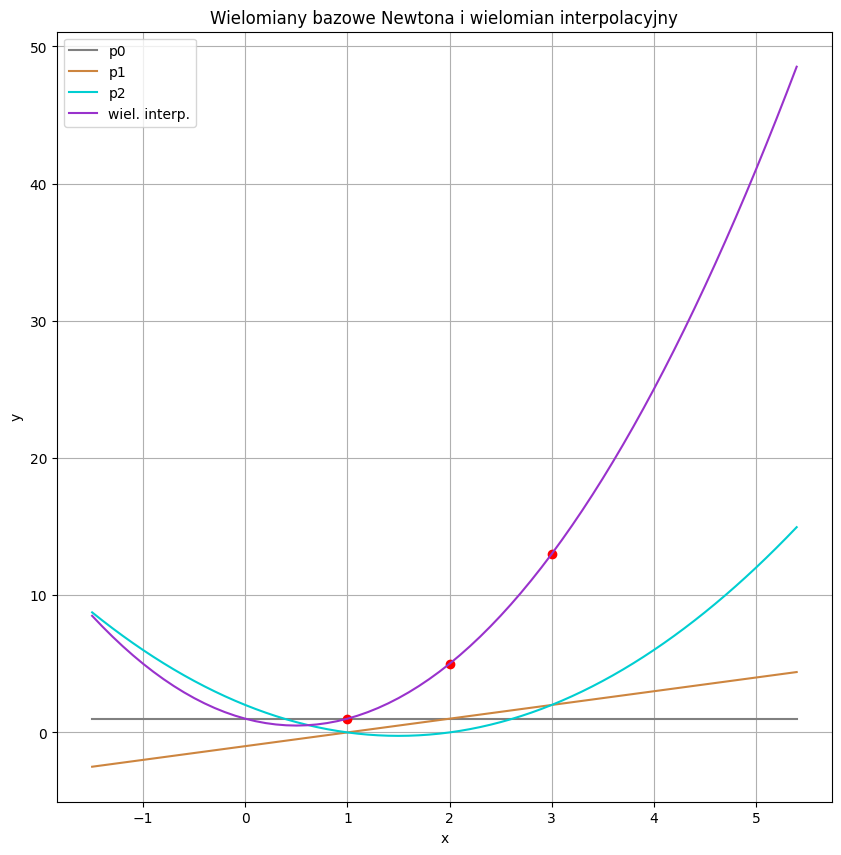

In [527]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

x = [1, 2, 3]
y = [1, 5, 13]

p0_coeff = [1, 0, 0]
p1_coeff = [-1, 1, 0]
p2_coeff = [2, -3, 1]

p0 = poly.Polynomial(p0_coeff)
p1 = poly.Polynomial(p1_coeff)
p2 = poly.Polynomial(p2_coeff)

x_plot = np.arange(-1.5, 5.5, 0.1)
fig = plt.figure(figsize = (10,10))
plt.plot(x_plot, p0(x_plot), "grey", label = "p0")
plt.plot(x_plot, p1(x_plot), "peru", label = "p1")
plt.plot(x_plot, p2(x_plot), "darkturquoise", label = "p2")
plt.plot(x, y, "ro")
interpolant = poly.Polynomial([1,-2,2])
plt.plot(x_plot, interpolant(x_plot), "darkorchid", label = "wiel. interp.")
plt.title("Wielomiany bazowe Newtona i wielomian interpolacyjny")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

##### **Uogólniony algorytm Hornera**

W celu wprowadzenia uogólnionego algorytmu Hornera, przypomnijmy algorytm Hornera obliczania wartości wielomianu w postaci naturalnej w zadanym punkcie. Jest to algorytm minimalizujący liczbę działań arytmetycznych, co jest niezwykle ważne w przypadku wykonywania obliczeń w arytmetyce zmiennopozycyjnej.

Niech
$$w(x)= \sum_{i=0}^n a_ix^i
= \big(\dots (a_nx + a_{n-1})x + \dots a_1 \big)x+a_0.
$$
Algorytm Hornera obliczania wartości wielomianu $w(x)$ w punkcie $z$ ma postać
$$
w_n=a_n 
$$
i dla $i=n-1, n-2, \dots, 0$
$$
w_i = w_{i+1}z+a_i 
$$ 
Ostatecznie
$$w(z)=w_0$$

Uogólnioniony algorytm Hornera służy do obliczania wartości wielomianu w postaci Newtona $N(x)$ w zadanym punkcie $z.$

Niech
$$
N_n(x)=\sum_{i=0}^n c_i p_i(x)
=c_0+c_1(x-x_0)+c_2(x-x_0)(x-x_1)+\dots+c_{n-1}(x-x_0)\dots(x-x_{n-2})+
$$
$$
+c_{n}(x-x_0)\dots(x-x_{n-2})(x-x_{n-1})=
$$
$$
=\Big(\big(\dots((c_n(x-x_{n-1})+c_{n-1})(x-x_{n-2})+c_{n-2})(x-x_{n-3})+\dots\big)(x-x_1)+c_1\Big)(x-x_0)+c_0
$$

Uogólniony algorytm Hornera 
$$
v_n=c_n 
$$
i dla $i=n-1, n-2, \dots, 0$
$$
v_i = v_{i+1}(z-x_i)+c_i
$$
Ostatecznie
$$N_n(z)=v_0.$$

##### **Zadanie 4** (1 pkt.)

Zaimplementuj uogólniony algorytm Hornera. Napisz funkcję `general_horner()`, która będzie zwracała wartości kolejnych $v_i$. 

Danymi wejściowymi mają być punkty $x_0, x_1, \dots, x_n,$ współczynniki $c_0, c_1, \dots, c_n$ i punkt $z.$  

Jako wynik mają być zwrócone wartości $v_n, v_{n-1}, \cdots, v_0.$ 

In [528]:
def general_horner(x, c, z):

    # UMIEŚĆ SWÓJ KOD TUTAJ

    v = [0] * (len(c) - 1 + 1)
    v[len(c) - 1] = c[len(c) - 1]
    for i in range(len(c) - 2, -1, -1):
        v[i] = c[i] + (z - x[i]) * v[i+1]
    return np.array(v, dtype=float)

print(general_horner([1, 2, 3], [1, 4, 2], 2))

[5. 4. 2.]


Przykładowy przypadek testowy 1:

```plaintext
[1, 2, 3]
[1, 4, 2]
2
```
oczekiwany wynik

```plaintext
[5, 4, 2]
```

Przykładowy przypadek testowy 1:

```plaintext
[1, 1, 1]
[1, 4, 2]
2
```
oczekiwany wynik

```plaintext
[7, 6, 2]
```

Literatura:

1. Lay D.C., Lay S.R., mcDonald J.J., *Linear algebra and its applications*, Pearson (2016)
2. Klein P.N., *Coding the matrix: linear algebra through the computer science applications*, Newtonian Press (2013).